<a href="https://colab.research.google.com/github/gibranfp/CursoDatosMasivosI/blob/main/notebooks/3a_funciones_hash.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tablas y funciones_hash_
## Tablas _hash_
Una tabla _hash_ es una estructura de datos que puede almacenar objetos, la cual permite realizar operaciones de _inserción_, _eliminación_ y _búsqueda_. Esta estructura de datos es particularmente útil cuando el número de objetos a almacenar es mucho menor al de todos los posibles objetos. En lugar de usar los objetos como índices, estos se obtienen mediante una función 

$$
h: \mathcal{U} \xrightarrow{} \{0, \ldots, m\}
$$

donde $m$ es el tamaño de la tabla (es decir, el número de cubetas que tiene) y $\mathcal{U}$ es el conjunto universal.

Las operaciones más comúnes de una tabla _hash} son:

* _Buscar_: Regresa la cubeta correspondiente al índice $h(x)$ en la tabla
* _Insertar_: Agrega un objeto $x$, este se mapea a la cubeta $h(x)$
* _Eliminar_: Quita el objeto $x$ de la cubeta $h(x)$


En el caso ideal, el tiempo promedio para estas operaciones en una tabla _hash_ es $O(1)$.

## Colisiones
El valor de $m$ depende del tamaño y la variedad de objetos que queramos almacenar. En general, se busca tener un tamaño de tabla lo suficientemente grande para almacenar todas las objetos distintas pero no demasiado grande como para requerir una cantidad de memoria considerablemente mayor a la que se va a utilizar. Tener un tamaño de tabla pequeño en comparación al número de objetos resulta en mayores _colisiones_, las cuales ocurren cuando 2 objetos distintas $\{x^{(i)}, x^{(j)}\}, x^{(j)} \ne x^{(j)}$ son mapeadas al mismo índice por la función _hash_ (es decir, $h(x^{(i)}) = h(x^{(j)})$). Al diseñar una función _hash_ se busca que sea rápida y fácil de calcular pero a la vez que tenga la mínima cantidad de colisiones. 

En muchas aplicaciones queremos reducir colisiones de objetos diferentes. Sin embargo, no es posible evitarlas por completo, por lo que es necesario emplear estrategias para lidiar con ellas. 

### Encadenamiento
Una de las estrategias más comunes para resolver colisiones se conoce como _encadenamiento_ y consiste en que cada cubeta de la tabla almacena una lista enlazada con todos los objetos que han sido mapeados al índice correspondiente. Es decir, si 2 objetos $x^{(1)}$ y $x^{(2)}$ colisionan, ambos se insertan en la lista enlazada de la cubeta a la que fueron mapeados. Las operaciones sobre la tabla quedan de la siguiente manera:

* _Buscar_: Examina si un objeto $x$ se encuentra en la lista enlazada de la cubeta correspondiente a $h(x)$.
* _Insertar_: Agrega $x$ a la lista enlazada de la cubeta correspondiente a $h(x)$.
* _Eliminar_: Busca el objeto $x$ en $h(x)$ y lo elimina de la lista enlazada.

En el mejor escenario todos los objetos se mapean distintos índices. En el caso ideal el tiempo de estas operaciones se mantiene como $O(1)$ pero en Pomedio es $\Theta(1 + \ell)$ para buscar y eliminar, donde $\ell = \tfrac{n}{m}$ es el tamaño esperado de las listas enlazadas.

### Direccionamiento abierto
Otro método común para resolver colisiones es el _direccionamiento abierto_, en el cual se sondean cubetas hasta encontrar alguna libre o la que contiene el objeto que se busca. Hay varias formas de realizar el sondeo: lineal, cuadrático o usando doble mapeo.

## Familias de funciones
La idea es definir una familia de funciones $\mathcal{H}$ y seleccionar $h$ de forma aleatoria e independiente de los objetos $x$.

## Propiedades de las funciones _hash_
De manera más específica es deseable que las funciones \emph{hash} $h$ tengan las siguiente Popiedades:

* Uniformidad: Si todos los índices son igualmente Pobables. La Pobabilidad de generar un valor es $\tfrac{1}{m}$, donde $m$ es el número de valores diferentes. Esto es, el número esperado de objetos distintos que se mapean a cada índice valor es el mismo.
    $$
    P_{h\in\mathcal{H}}[h(x) = i] = \frac{1}{m}, \text{para cada $x$ y cada $i$}
    $$
* _Universal_: Si la familia de funciones minimiza el número de colisiones. 
    $$
    P_{h\in\mathcal{H}}[h(x) = h(y)] \leq \frac{1}{m}, \text{para cada $x \ne y$}
    $$
_Casi-universal_: Si la familia de funciones es cercana a ser universal
    $$
    P_{h\in\mathcal{H}}[h(x) = h(y)] \leq \frac{2}{m}, \text{para cada $x \ne y$}
    $$

In [41]:
from abc import ABC, abstractmethod 
from math import floor, sqrt, exp

import random

import numpy as np
import matplotlib.pyplot as plt

## Diccionarios en Python
Los diccionarios de Python se llevan a cabo a través de tablas _hash_. Por ej. podemos almacenar 2 conjuntos usando esta estructura de datos.

In [2]:
o = {}
o['O1']=(0, 2, 0, 4)
o['O2']=(1, 2, 0, 2)
    
print('O1 = {0}, O2 = {1}'.format(o['O1'], o['O2']))

O1 = (0, 2, 0, 4), O2 = (1, 2, 0, 2)


También es posible hacer lo contrario.

In [3]:
o2 = {}
o2[(0,2,0,4)]='O1'
o2[(1,2,0,2)]='O2'

print('(0,2,0,4) = {0}'.format(o2[(0,2,0,4)]))
print('(1,2,0,2) = {0}'.format(o2[(1,2,0,2)]))

(0,2,0,4) = O1
(1,2,0,2) = O2


Más generalmente podemos crear diccionarios usando cualquier tipo o estructura de datos al que se le pueda aplicar la función `hash`.

In [4]:
print('Hash de 1 es {0}'.format(hash(1)))
print('Hash de 3.14 es {0}'.format(hash(3.14)))
print('Hash de \'10\' es {0}'.format(hash('10')))
print('Hash de (1,2) es {0}'.format(hash((1,2))))
print('Hash de (1,2,0,2) es {0}'.format(hash((1,2,0,2))))

Hash de 1 es 1
Hash de 3.14 es 322818021289917443
Hash de '10' es -1056314950540118654
Hash de (1,2) es 3713081631934410656
Hash de (1,2,0,2) es 485695305516660284


## Creando tablas _hash_ en Python
Definimos una clase abstracta para nuestra estructura de datos, especificando sus métodos principales.

In [5]:
class TablaHash(ABC):
  def __init__(self, n_cubetas):
    self.n_cubetas = n_cubetas
    self.tabla = [[] for i in range(n_cubetas)]

  def __getitem__(self, x):
    return self.tabla[self.h(x)]

  def __repr__(self):
    contenido = ['%d::%s' % (i, self.tabla[i]) for i in range(self.n_cubetas)]
    return "<TablaHash :%s >" % ('\n'.join(contenido))

  def __str__(self):
    contenido = ['%d::%s' % (i, self.tabla[i]) for i in range(self.n_cubetas) if self.tabla[i]]
    return '\n'.join(contenido)

  @abstractmethod
  def h(self, x):
    pass

  @abstractmethod
  def insertar(self, x):
    pass

  @abstractmethod
  def buscar(self, x):
    pass
    
  @abstractmethod
  def eliminar(self, x):
    pass

## Familia $\mathcal{H}$ por método de división
Comúnmente se busca diseñar funciones _hash_ $h$ que sean independientes de los objetos a almacenar. Un método general para crear funciones _hash_ se conoce como el _método de división_ y consiste en usar el residuo de la división del objeto y el tamaño de la tabla $m$, esto es,

\begin{equation}
    h(x) = x \mod{m}
\end{equation}

Es conveniente usar un número primo para $m$.

Definimos una clase hija de `TablaHash` que implemente la función anterior. Para resolver colisiones usamos encadenamiento, esto es, cada cubeta o registro de la tabla es una lista que contiene todos los objetos que son mapeados al índice correspondiente.

In [6]:
class THMod(TablaHash):
  def h(self, x):
    return x % self.n_cubetas

  def insertar(self, x):
    self.tabla[self.h(x)].append(x)
  
  def buscar(self, x):
    return x in self.tabla[h(x)]
      
  def eliminar(self, x):
    self.tabla[self.h(x)].remove(x)

Probemos nuestra tabla con un conjunto 5 de números

In [7]:
enteros = [1, 10, 36, 78, 93]
n_cubetas = 11

thmod = THMod(n_cubetas)
for i,e in enumerate(enteros):
  thmod.insertar(e)
print(thmod)

1::[1, 78]
3::[36]
5::[93]
10::[10]


¿Qué pasa si tenemos una lista de objetos más grande?

In [8]:
enteros = [12454, 73523, 9865, 12310, 12, 864189, 882113, 27, 36, 39654, 4, 481, 1155, 634, 69, 782, 1232, 9433]

thmod_mas = THMod(n_cubetas)
for i,e in enumerate(enteros):
  thmod_mas.insertar(e)
print(thmod_mas)

0::[1155, 1232]
1::[12310, 12, 882113, 782]
2::[12454]
3::[36, 69]
4::[4]
5::[27]
6::[9433]
7::[864189, 634]
8::[481]
9::[9865]
10::[73523, 39654]


Para evitar colisiones podemos aumentar el tamaño de la tabla. Suponiendo que  la función anterior es uniforme, ¿cuál sería la probabilidad de colisión si deseamos almacenar $n$ objetos en una tabla de tamaño $m$? Podemos calcular esta probabilidad como el complemento de la probabilidad que no haya colisión.

$$
\begin{align*}
Pr[h(x) = h(y)] & = 1 - P[h(x) \ne h(y)] \\
& =  1 - \frac{m}{m} \times \frac{m - 1}{m} \times \cdots \times \frac{m - n + 1}{m} 
\end{align*}
$$

In [9]:
def cumple(m, n):
  prod = 1
  for i in range(n):
    prod *= (m - i) / m
  
  return 1.0 - prod

Este problema está relacionado a la _paradoja del cumpleaños_, en el cual se tienen un conjunto $n$ de personas y se busca calular la probabilidad de que al menos 2 personas cumplan años el mismo día. En este caso las probabilidades para diferentes valores de $n$ quedan de la siguiente manera:

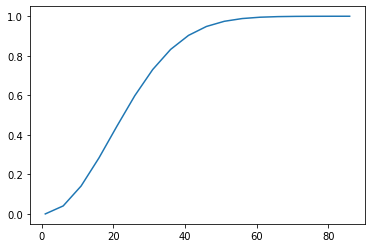

In [10]:
import matplotlib.pyplot as plt

pcs = []
n_personas = range(1,90,5)
for n in n_personas:
  pcs.append(cumple(365, n))

plt.plot(range(1,90,5), pcs)
plt.show()

Regresando al problema de las colisiones en nuestra tabla, las probabilidades para $m = 10$  serían

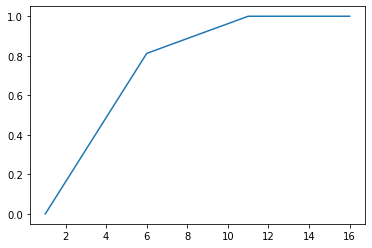

In [11]:
pcs = []
n_personas = range(1,20,5)
for n in n_personas:
  pcs.append(cumple(11, n))

plt.plot(n_personas, pcs)
plt.show()

Podemos hacer más grande el tamaño de la tabla para reducir el número de colisiones. La probabilidad de colisión para $n = 18$ y diferentes valores de $m$ es

In [12]:
emes = range(1, 1500, 100)
n = len(enteros)
probs = []
for m in emes:
  probs.append(cumple(m, n))

En lugar de hacer el cálculo de la probabilidad exacta con la función `cumple`, es posible aproximarla de la siguiente manera:

$$
P[h(x) = h(y)] \approx 1 - e^{\frac{-n^2}{2m}}
$$

In [13]:
def cumple_aprox(m, n):
  return 1.0 - exp((-n**2) / (2 * m))

aprox = []
for m in emes:
  aprox.append(cumple_aprox(m, n))

Graficamos las probabilidades de colisión con diferentes tamaños de tabla calculadas con las 2 estrategias

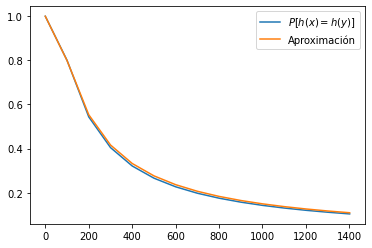

In [14]:
plt.plot(emes, probs, label='$P[h(x) = h(y)]$')
plt.plot(emes, aprox, label='Aproximación')
plt.legend()
plt.show()

Asimismo, podemos calcular el número esperado de colisiones para valores dados de $m$ y $n$ de la siguiente manera

$$
\mathbb{E}[\text{colisiones}] = n - m \cdot \left(1 - \frac{m - 1}{m}\right)^{n}
$$

In [15]:
def n_colisiones_esperado(m, n): 
  return n - m * (1 - ((m - 1) / m)**n)

Para una tabla con 11 cubetas y 18 números a almacenar esperaríamos el siguiente número de colisiones:

In [16]:
n_colisiones_esperado(11, 18)

8.978446689001352

El número de colisiones que ocurrieron para el caso anterior fue:

In [17]:
sum([len(c) - 1 for c in thmod_mas.tabla if len(c) > 1])

7

Si aumentamos el tamaño de la tabla a 281 cubetas esperaríamos

In [18]:
n_cubetas = 281
n_colisiones_esperado(n_cubetas, 18)

0.5342863185881868

Registremos los números en una tabla con este número de cubetas

In [38]:
thmod_grande = THMod(n_cubetas)
for i,e in enumerate(enteros):
  thmod_grande.insertar(e)
print(thmod_grande)

4::[4]
12::[12]
27::[27]
30::[9865]
31::[1155]
33::[39654]
36::[36]
54::[882113]
69::[69]
72::[634]
90::[12454]
108::[1232]
114::[864189]
160::[9433]
182::[73523]
200::[481]
220::[782]
227::[12310]


Si tenemos más números para almacenar, el número esperado de colisiones sería:

In [20]:
n_objetos = 200
n_colisiones_esperado(n_cubetas, n_objetos)

56.73636182748538

Veamos que pasa con nuestra tabla anterior si almacenamos 200 números

In [21]:
conj = np.random.randint(1000, high=5890123, size=n_objetos)
thmod_mas_grande = THMod(n_cubetas)
for i,e in enumerate(conj):
  thmod_mas_grande.insertar(e)
print(thmod_mas_grande)

2::[1814700]
4::[5804059, 438645]
6::[1578383]
7::[1123164]
8::[4273456, 4825902]
12::[5792827]
13::[5454785]
16::[94713]
18::[4541540]
20::[1868951, 5699824]
21::[4103745, 1861365]
22::[204028]
24::[781766]
26::[871969, 2896293]
31::[5254169]
32::[2854992]
33::[182402]
34::[635375, 4074815]
40::[4842232, 4016373]
41::[4191718]
42::[2128055, 1220706, 342019, 902614]
43::[2807795]
46::[8476]
47::[1263142, 254071]
51::[2507414]
54::[388115]
59::[2240191, 3509468]
60::[1595297, 4728166]
62::[3609226]
63::[5883922]
65::[2876381]
66::[2851092]
67::[1922669, 3073083]
70::[4806294]
72::[4849851]
73::[518237, 4934433]
74::[5182838]
75::[4487926]
76::[4381147]
78::[1008306]
80::[5145190]
83::[809644]
84::[4721446]
85::[4754043]
92::[2654699]
93::[3762964]
97::[4001537]
98::[3536764]
101::[2091303]
103::[2200333]
104::[235020]
105::[2380175, 3589318, 2328190]
107::[217039, 663829]
109::[48160]
110::[1721516]
111::[1643118]
112::[4159755]
116::[3571345]
120::[5640914, 2272005]
122::[3283607, 2608

Examinemos la cantidad de números mapeados a cada cubeta por nuestra función _hash_

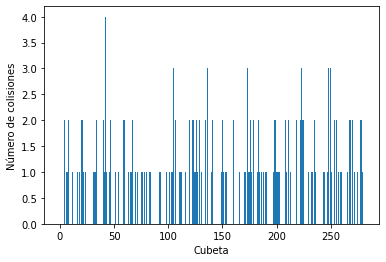

In [22]:
cubetas = [c for c in range(n_cubetas)]
tam_cubetas = [len(c) for c in thmod_mas_grande.tabla]
plt.bar(cubetas, tam_cubetas)
plt.xlabel('Cubeta')
plt.ylabel(u'Número de colisiones')
plt.show()

El número de colisiones que ocurrieron es

In [23]:
sum([len(c) - 1 for c in thmod_mas_grande.tabla if len(c) > 1])

58

## Direccionamiento abierto

En lugar de usar encadenamiento, podemos usar direccionamiento abierto resolver colisiones. En esta estrategia, si hay una colisión, se sondean otras cubetas o registros en la tabla hasta encontrar una libre. Si no hay ninguna disponible decimos que la tabla está llena y es necesario aumentar su tamaño para poder almacenar más objetos. 

Para determinar el siguiente índice a examinar es necesario extender la función hash para que incorpore la información de índice. Esta función debe garantizar que se examinen todos los índices en caso de que ninguno esté disponible. 

### Sondeo lineal
Una estrategia común para extender nuestra función _hash_ es el sondeo lineal, el cual está dado por

$$
h(x, i) = (h'(x) + i)\mod{m}
$$


In [24]:
class THModOA(TablaHash):
  def __init__(self, n_cubetas):
    super().__init__(n_cubetas)
    self.colisiones = np.zeros(n_cubetas)

  def h(self, x):
    return x % self.n_cubetas

  def sl(self, x, i):
    return (self.h(x) + i) % self.n_cubetas

  def insertar(self, x):
    llena = True
    for i in range(self.n_cubetas):
      ind = self.sl(x, i)

      if i == 0:
        self.colisiones[ind] += 1
        
      if not self.tabla[ind]:
        self.tabla[ind].append(x)
        llena = False
        break

    if llena:
      print('Tabla llena')

  def buscar(self, x):
    for i in range(self.n_cubetas):
      ind = self.sl(x, i)
      if self.tabla[ind][0] == x:
        return ind

    return -1

  def eliminar(self, x):
    for i in range(self.n_cubetas):
      ind = self.sl(x, i)
      if self.tabla[ind][0] == x:
        self.tabla[ind].remove(x)

Intentemos nuevamente con el conjunto anterior usando esta estrategia

In [25]:
thmodoa = THModOA(n_cubetas)
for i,e in enumerate(conj):
  thmodoa.insertar(e)
print(thmodoa)

0::[2660224]
2::[1814700]
4::[5804059]
5::[438645]
6::[1578383]
7::[1123164]
8::[4273456]
9::[4825902]
12::[5792827]
13::[5454785]
16::[94713]
18::[4541540]
20::[1868951]
21::[4103745]
22::[204028]
23::[1861365]
24::[781766]
25::[5699824]
26::[871969]
27::[2896293]
31::[5254169]
32::[2854992]
33::[182402]
34::[635375]
35::[4074815]
40::[4842232]
41::[4016373]
42::[2128055]
43::[2807795]
44::[1220706]
45::[342019]
46::[902614]
47::[4191718]
48::[8476]
49::[1263142]
50::[254071]
51::[2507414]
54::[388115]
59::[2240191]
60::[1595297]
61::[4728166]
62::[3609226]
63::[5883922]
64::[3509468]
65::[2876381]
66::[2851092]
67::[1922669]
68::[3073083]
70::[4806294]
72::[4849851]
73::[518237]
74::[4934433]
75::[4487926]
76::[4381147]
77::[5182838]
78::[1008306]
80::[5145190]
83::[809644]
84::[4721446]
85::[4754043]
92::[2654699]
93::[3762964]
97::[4001537]
98::[3536764]
101::[2091303]
103::[2200333]
104::[235020]
105::[2380175]
106::[3589318]
107::[217039]
108::[663829]
109::[48160]
110::[1721516]

## Familias por método de multiplicación
Otra estrategia para diseñar funciones _hash_ es el de multiplicación. En este método primero se multiplica el objeto $x$ por una constante $a \in (0,1)$ y se extrae la parte fraccional de $a \cdot x$. Posteriormente, se multiplica este valor por $m$ y se toma la función piso $\lfloor\rfloor$
$$
h(x) = \lfloor m  \cdot (x \cdot a \mod 1)\rfloor
$$

donde $a$ es una constante.

In [29]:
class THMultOA(TablaHash):
  def __init__(self, n_cubetas, a):
    super().__init__(n_cubetas)
    self.colisiones = np.zeros(n_cubetas)    
    self.a = a
  
  def h(self, x):
    return floor(((self.a * x) % 1) * self.n_cubetas) 

  def sl(self, x, i):
    return (self.h(x) + i) % self.n_cubetas

  def insertar(self, x):
    llena = True
    for i in range(self.n_cubetas):
      ind = self.sl(x, i)

      if i == 0:
        self.colisiones[ind] += 1
      
      if not self.tabla[ind]:
        self.tabla[ind].append(x)
        llena = False
        break

    if llena:
      print('Tabla llena')

  def buscar(self, x):
    for i in range(self.n_cubetas):
      ind = self.sl(x, i)
      if self.tabla[ind][0] == x:
        return ind

    return -1

  def eliminar(self, x):
    for i in range(self.n_cubetas):
      ind = self.sl(x, i)
      if self.tabla[ind][0] == x:
        self.tabla[ind].remove(x)

Aunque $a$ puede tomar cualquier valor en el intervalo $(0,1)$, hay algunos valores que funcionan mejor que otros. Donald Knuth recomienda $a \approx \frac{\sqrt{5} - 1}{2}$.

In [30]:
thmultoa = THMultOA(281, (sqrt(5) - 1) / 2)
for i,e in enumerate(conj):
  thmultoa.insertar(e)
print(thmultoa)

0::[1436044]
4::[4112125]
6::[3251983]
7::[4016373]
8::[1050884]
9::[5254169]
10::[1041857]
11::[5182838]
13::[158082]
14::[2380175]
15::[3718315]
16::[4273456]
17::[4806294]
18::[4632789]
19::[4537524]
21::[2507414]
22::[518237]
23::[2678458]
24::[2009710]
25::[4541540]
26::[2854992]
29::[4721446]
30::[3693687]
31::[1042205]
32::[773579]
36::[902614]
37::[1778671]
38::[5449584]
39::[1299199]
40::[4719574]
44::[4754043]
45::[878062]
46::[309336]
47::[4074815]
50::[2240191]
52::[2692493]
53::[5082114]
54::[5134349]
55::[1556727]
56::[4191718]
57::[905834]
59::[2654699]
62::[954765]
63::[2876381]
64::[3513312]
67::[204028]
68::[1729237]
69::[1868951]
70::[5264939]
71::[4783027]
73::[388115]
76::[3844234]
78::[1814700]
80::[1131435]
81::[4426846]
82::[4728166]
83::[5145190]
84::[1079556]
86::[675486]
87::[2272005]
88::[3429231]
89::[2128055]
90::[1784548]
91::[3902438]
92::[4934433]
93::[2083517]
94::[2091303]
95::[3609226]
96::[1578383]
97::[635375]
98::[235020]
99::[5196095]
100::[10117

La cantidad de números mapeados a cada cubeta por esta función _hash_ es

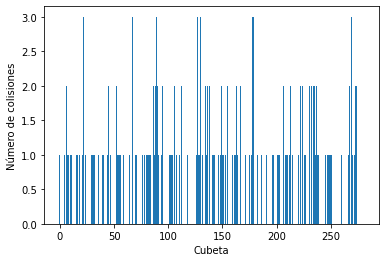

In [39]:
plt.bar(np.arange(thmultoa.colisiones.size), thmultoa.colisiones)
plt.xlabel('Cubeta')
plt.ylabel(u'Número de colisiones')
plt.show()

El total de colisiones que ocurrieron en la tabla fue

In [40]:
np.sum(thmultoa.colisiones[thmultoa.colisiones > 1] - 1)

50.0

## Familia de funciones _hash_ universal
Una familia de funciones universal es
$$
\mathcal{H}_{a,b}(x) = ((a\cdot x + b)\mod{p})\mod{m}
$$

donde $p$ es un número primo muy grande, $a \in \{1, 2, \ldots, p-1\}$ y $b\in \{0, 1, 2, \ldots, p-1\}$

In [33]:
class THUnivOA(TablaHash):
  def __init__(self, n_cubetas, a, b, primo):
    super().__init__(n_cubetas)
    self.colisiones = np.zeros(n_cubetas) 
    self.a = a
    self.b = b
    self.primo = primo
  
  def h(self, x):
    return ((self.a * x + self.b) % self.primo) % self.n_cubetas

  def sl(self, x, i):
    return (self.h(x) + i) % self.n_cubetas

  def insertar(self, x):
    llena = True
    for i in range(self.n_cubetas):
      ind = self.sl(x, i)
      
      if i == 0:
        self.colisiones[ind] += 1
      
      if not self.tabla[ind]:
        self.tabla[ind].append(x)
        llena = False
        break

    if llena:
      print('Tabla llena')

  def buscar(self, x):
    for i in range(self.n_cubetas):
      ind = self.sl(x, i)
      if self.tabla[ind][0] == x:
        return ind

    return -1

  def eliminar(self, x):
    for i in range(self.n_cubetas):
      ind = self.sl(x, i)
      if self.tabla[ind][0] == x:
        self.tabla[ind].remove(x)

Instanciamos nuestra tabla con función _hash_ universal y almacenamos el conjunto de 200 números

In [34]:
a = random.randint(1, 4294967291 - 1)
b = random.randint(0, 4294967291 - 1)
thunivoa = THUnivOA(281, a, b, 4294967291)
for i,e in enumerate(conj):
  thunivoa.insertar(e)
print(thunivoa)

5::[5144684]
6::[5134349]
7::[2660224]
9::[5182838]
10::[1579442]
11::[4074815]
12::[2347061]
13::[3283607]
14::[518237]
15::[4783027]
16::[14542]
17::[8476]
18::[2783484]
19::[1041857]
22::[4426846]
23::[2396565]
24::[10001]
29::[4487926]
33::[4825902]
35::[4247499]
36::[46244]
37::[1949489]
38::[1354690]
39::[3251983]
40::[1436044]
41::[17903]
42::[1643118]
44::[1741813]
49::[902614]
50::[1868951]
51::[388115]
52::[48160]
53::[4976646]
55::[2507414]
56::[1595297]
57::[4141024]
58::[3589318]
59::[3337434]
60::[5449584]
61::[365279]
62::[5699824]
63::[1011741]
64::[3536764]
65::[1263142]
68::[5193924]
70::[1861365]
71::[3073083]
72::[954765]
73::[905834]
75::[254071]
77::[533478]
78::[217039]
79::[1729237]
80::[3772954]
81::[377370]
82::[50273]
83::[2014054]
84::[5196095]
85::[5792827]
86::[1101206]
87::[204028]
88::[1001666]
89::[4273456]
90::[4191718]
91::[2608926]
92::[2896293]
93::[4754043]
97::[1136026]
98::[3803789]
100::[4016373]
101::[4632789]
102::[3609226]
103::[1264915]
104:

La cantidad de números mapeados a cada cubeta por la función _hash_ universal es

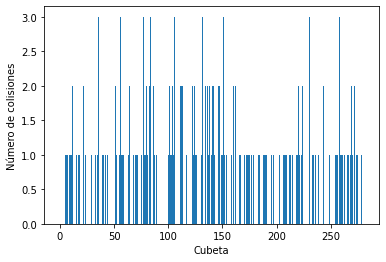

In [42]:
plt.bar(np.arange(thunivoa.colisiones.size), thunivoa.colisiones)
plt.xlabel('Cubeta')
plt.ylabel(u'Número de colisiones')
plt.show()

El número de colisiones totales que ocurrieron es

In [43]:
np.sum(thunivoa.colisiones[thunivoa.colisiones > 1] - 1)

48.0

## Funciones hash para cadenas

Si deseamos almacenar cadenas de símbolos, es necesario convertirla a un solo número. La forma más simple es sumar sus códigos pero esto genera colisiones en palabras que usan los mismos símbolo. Una alternativa es la suma de los códigos multiplicados por un constante elevada a la posición

$$
f(s) = s_1 \cdot g^1 + s_2 \cdot g^2 + \cdots + s_d \cdot g^d
$$

Modificamos nuestra clase anterior para que cuando haya una colisión verifique si es la misma subcadena y si es así lleve la cuenta del número de veces que ocurre.

In [74]:
class THUnivCad(THUnivOA):
  def __init__(self, n_cubetas, a, b, primo, g):
    super().__init__(n_cubetas, a, b, primo)
    self.g = g
  
  def s2i(self, s):
    l = [c for c in s]
    suma = 0
    for i in l:
      suma += ord(i) * self.g**ord(i)

    return suma

  def h(self, x):
    return ((self.a * x + self.b) % self.primo) % self.n_cubetas

  def sl(self, x, i):
    return (self.h(x) + i) % self.n_cubetas

  def insertar(self, s):
    x = int(self.s2i(s))
    llena = True
    for i in range(self.n_cubetas):
      ind = self.sl(x, i)

      if i == 0:
        self.colisiones[ind] += 1
      
      if not self.tabla[ind]:
        self.tabla[ind].append(s)
        llena = False
        break

    if llena:
      print('Tabla llena')

  def buscar(self, s):
    x = self.s2i(s)
    for i in range(self.n_cubetas):
      ind = self.sl(x, i)
      if self.tabla[ind][0] == s:
        return ind

    return -1

  def eliminar(self, s):
    x = self.s2i(s)
    for i in range(self.n_cubetas):
      ind = self.sl(x, i)
      if self.tabla[ind][0] == s:
        self.tabla[ind].remove(s)

Veamos un ejemplo

In [78]:
nombres = ['blanca', 'juan', 'pedro', 'julia', 'serena', 'enrique', 'jose', 'alfonso', 'rodolfo', 'ignacio', 'gibran', 'mariana']
thucad = THUnivCad(281, a, b, 4294967291, 1.1)
for e in nombres:
  thucad.insertar(e)
print(thucad)

3::['jose']
7::['julia']
15::['alfonso']
74::['blanca']
129::['enrique']
141::['juan']
161::['ignacio']
179::['serena']
195::['mariana']
250::['pedro']
262::['gibran']
275::['rodolfo']


Revisemos la cantidad de nombres mapeados a cada cubeta

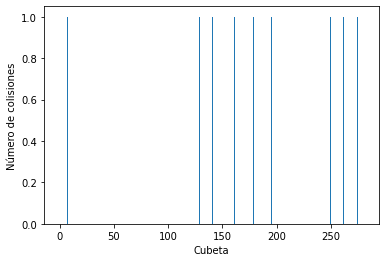

In [80]:
plt.bar(np.arange(thucad.colisiones.size), thucad.colisiones)
plt.xlabel('Cubeta')
plt.ylabel(u'Número de colisiones')
plt.show()

## Ejercicio
Realiza lo siguiente:
1. Implementa una tabla que realice sondeo cuadrático. Elige un número primo grande para $m$ y $c_1 = c_2 = 0.5$ y prueba la tabla con el conjunto de 200 números. 

$$
h(x, i) = (h'(x) + c_1i + c_2i^2)\mod{m}
$$

2. Desarrolla un programa que cuente el número de ocurrencias de todas las subcadenas de longitud entre 5 a 10 (sin considerar espacios en blanco ni signos de admiración/interrogación ni caracteres especiales) usando funciones y tablas _hash_. Prueba este programa en la base de datos de _20 newsgroups_.